In [6]:
import joblib
import pandas as pd
from pathlib import Path
import json

### Visualize a strategie's most likely response per group

In [36]:
input_path = Path("_2022_09_06_23_35_29_396494/agent.joblib")

In [37]:
with open(input_path, "rb") as input_file:
    e = joblib.load(input_file)

In [38]:
e.keys()

dict_keys(['regret', 'timestep', 'strategy', 'pre_flop_strategy'])

In [39]:
e["timestep"]

420

In [40]:
def vis_key(agent,key):
    df=pd.DataFrame(index=agent[key].keys(), data=agent[key].values())
    i=pd.DataFrame([json.loads(x) for x in df.index])
    df.reset_index(drop=True, inplace=True)
    df=pd.concat([df,i], axis=1)
    means=df.groupby("cards_cluster")[["fold","call"
    ,"raise"]].mean()
    means.plot.line()


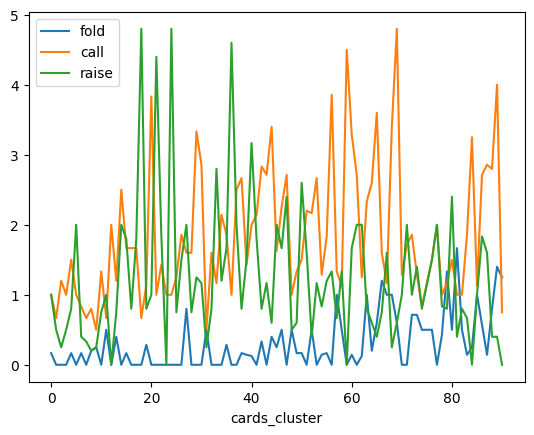

In [41]:
vis_key(e,"pre_flop_strategy")